<a href="https://colab.research.google.com/github/vkopey/Root4Dig/blob/main/Root4Dig_form.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

def plotHist(values = [1, 2, 3, 4, 5], frequencies = [5, 10, 15, 20, 25]):
  data = np.repeat(values, frequencies)
  plt.hist(data, bins=len(values), edgecolor='black')
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.title('Histogram of Values and Frequencies')
  plt.show()

def plotBar(col):
  counts = df[col].value_counts().sort_index()
  plt.bar(counts.index, counts.values)
  plt.xticks(ticks=range(len(counts)), labels=counts.index)
  plt.xlabel('Відповідь'); plt.ylabel('Кількість')
  plt.title(col)
  plt.show()

df = pd.read_csv('form0.csv', delimiter=';') # Завантаження даних CSV-файлу

# Припустимо, що всі питання вже мають числові значення.
# Якщо ні – застосуйте one-hot encoding або Label Encoding:
# df = pd.get_dummies(df, columns=['question1', 'question2', ...])

# print(df.head()) # Переглянемо перші рядки, щоб ознайомитись із даними

['к) інші види' 'а) писанкарство;' 'л) не володію жодним.'
 'з) співаю народні пісні;' 'е) вишивка;'
 'д) художня обробка деревини (різьбярство);'
 'ж) сувенірна продукція народних ремесел;' 'в) гончарство;'
 'є) художня обробка шкіри;']
C3
2    60
1    33
0    22
Name: count, dtype: int64
[55 20 17 17 18 19 18 18 24 19 20 17 19 20 19 22 17 18 20 17 18 17 37 18
 19 18 38 18 19 18 20 21 17 18 20 19 24 18 18 18 18 26 27 18 19 18 18 17
 17 17 17 18 17 18 19 24 22 18 19 20 20 19 17 17 17 17 18 17 17 17 18 17
 17 17 17 17 18 18 17 18 18 20 18 20 20 19 19 20 20 20 20 19 19 20 18 17
 18 20 20 18 18 19 18 18 18 18 19 20 17 17 18 28 32 27 17]


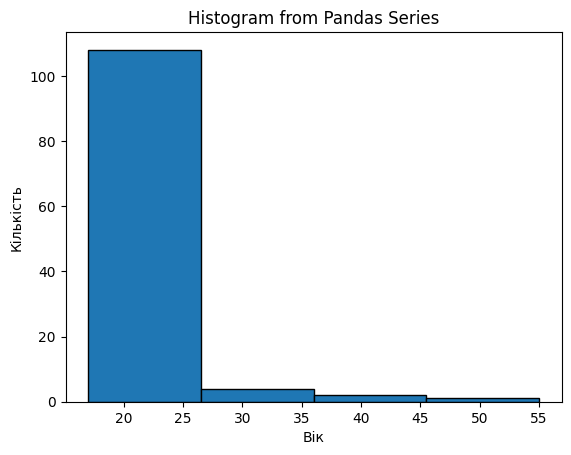

[0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0
 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1
 1 1 1 0]


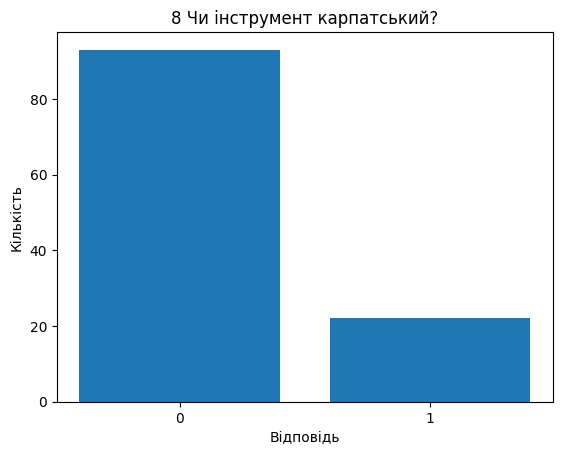

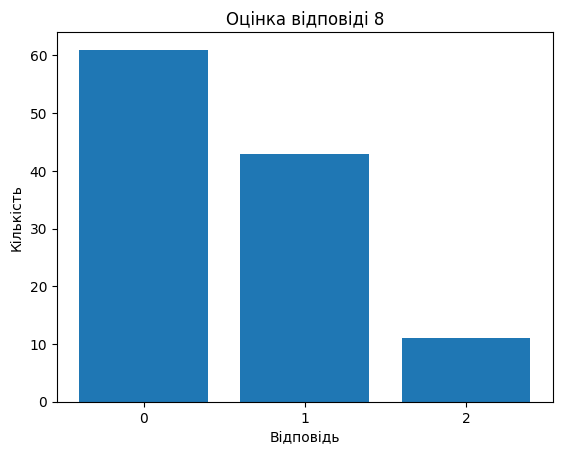

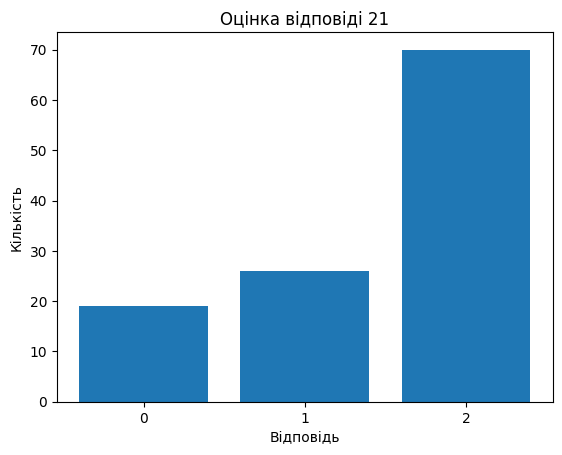

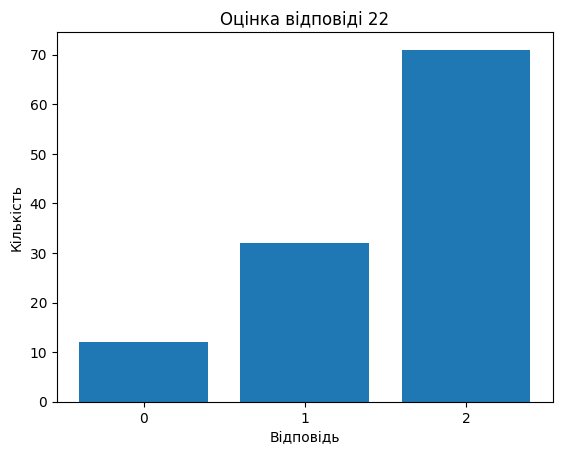

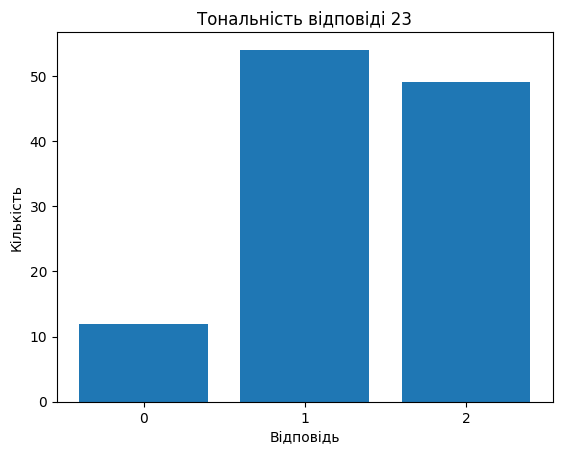

In [2]:
A2="2. Вік і стать "
A61="6.1 На скільки володієте розмовною англійською мовою: 1 – 2 – 3 – 4 – 5, де 1 – дуже добре володію, 5 – погано володію."
A62="6. 2 На скільки володієте розмовною румунською мовою: 1 – 2 – 3 – 4 – 5, де 1 – дуже добре володію, 5 – погано володію."
A7="7. Чи брали ви раніше участь у культурних фестивалях та/або студентських таборах?"
A8="8. Чи брали Ви участь у наукових дослідженнях (написання наукових тез, статей, збір емпіричних даних тощо):"
A9="9. Чи брали Ви участь у наукових конференціях:"
A10="10. Чи брали Ви участь у наукових/освітніх/міжнародних проектах:"
C1="1. Чи цікавитеся ви національними традиціями?"
C2="2. Чи хотіли б ви глибше пізнати культуру спільних Карпат?"
C3="3. Чи готові ви взяти участь у міжнародному проєкті «Відкриття наших спільних культурних коренів і оцифровування їх для майбутніх поколінь» (HUSKROUA)?"
C4="4. Яким ремісничим мистецтвом ви володієте:"
D1="8 Чи інструмент карпатський?"
D2="Оцінка відповіді 8"
D3="Оцінка відповіді 21"
D4="Оцінка відповіді 22"
D5="Тональність відповіді 23"
print(df[C4].unique())
df['A7'] = df[A7].map({"ні": 0, "так": 1})
df['A8'] = df[A8].map({"ні": 0, "так": 1})
df['A9'] = df[A9].map({"ні": 0, "так": 1})
df['A10'] = df[A10].map({"ні": 0, "так": 1})
df['C1'] = df[C1].map({"ні": 0, "важко відповісти": 1, "так": 2})
df['C2'] = df[C2].map({"ні": 0, "важко відповісти": 1, "так": 2})
df['C3'] = df[C3].map({"ні": 0, "важко відповісти.": 1, "так": 2})
print(df['C3'].value_counts())
#df['C3']
S="""а) писанкарство;
б) вовноплетіння/ткацтво;
в) гончарство;
г) кераміка;
д) художня обробка деревини (різьбярство);
е) вишивка;
є) художня обробка шкіри;
ж) сувенірна продукція народних ремесел;
з) співаю народні пісні;
к) інші види
л) не володію жодним."""
df['C4']=df[C4].map({v:k for k,v in enumerate(S.splitlines())})

# додаємо стовпчик з віком
def reMatch(text):
  mo=re.search(r"\d\d", text, re.S)
  if mo:
      return int(mo.group(0))
  else:
      return 0
df["вік"]=df[A2].apply(reMatch)
print(df["вік"].values)

df["вік"].plot.hist(bins=4, edgecolor='black')
plt.xlabel('Вік'); plt.ylabel('Кількість')
plt.title('Histogram from Pandas Series')
plt.show()

# додаємо стовпчик зі статтю
def reMatch(text):
  mo=re.search(r"ж|Ж|д", text)
  if mo:
      return 0
  else:
      return 1
df["стать"]=df[A2].apply(reMatch)
print(df["стать"].values)

#plotBar("стать")
#plotBar(A61)
#plotBar(A62)
#plotBar(A7)
#plotBar(A8)
#plotBar(A9)
#plotBar(A10)
#counts = df['C4'].value_counts()#.sort_index()
#plt.bar(counts.index, counts.values)
#plt.xticks(ticks=range(12), labels=range(12))
#plt.xlabel('Відповідь'); plt.ylabel('Кількість')
#plt.title(C4)
#plt.show()
#df['C4']
plotBar(D1)
plotBar(D2)
plotBar(D3)
plotBar(D4)
plotBar(D5)

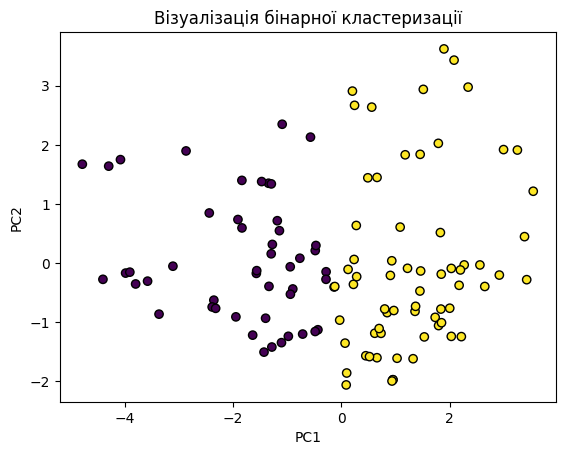

In [3]:
from sklearn.preprocessing import StandardScaler
# Якщо додавати усі ознаки (мабуть окрім статі), то кластеризація визначає рівень знань+умінь+зацікавленості
F=['вік','стать',A61,A62,'A7','A8','A9','C1','C2','C3',D1,D2,D3,D4,D5]
features = df[F] # ознаки
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# зменшити розмірність до 2 для візуалізації
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

#from sklearn.manifold import TSNE
#tsne = TSNE(n_components=2, random_state=42)
#pca_features = tsne.fit_transform(scaled_features)

#import umap
#umap_reducer = umap.UMAP(n_components=2)
#pca_features = umap_reducer.fit_transform(scaled_features)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_features)
#clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters # Додаємо отримані мітки до датафрейму

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Візуалізація бінарної кластеризації')
plt.show()

In [4]:
df[F+['Cluster']][10:20]

,вік,стать,"6.1 На скільки володієте розмовною англійською мовою: 1 – 2 – 3 – 4 – 5, де 1 – дуже добре володію, 5 – погано володію.","6. 2 На скільки володієте розмовною румунською мовою: 1 – 2 – 3 – 4 – 5, де 1 – дуже добре володію, 5 – погано володію.",A7,A8,A9,C1,C2,C3,8 Чи інструмент карпатський?,Оцінка відповіді 8,Оцінка відповіді 21,Оцінка відповіді 22,Тональність відповіді 23,Cluster
10,20,1,3,5,0,1,0,0,0,0,0,1,0,0,0,0
11,17,1,3,5,0,1,0,2,2,1,0,1,0,1,1,0
12,19,0,2,5,0,1,1,2,1,2,0,0,0,1,1,0
13,20,0,3,5,0,0,1,2,2,1,0,0,2,2,2,1
14,19,1,4,5,0,0,0,2,2,2,0,0,2,2,2,1
15,22,0,2,5,0,1,1,2,2,2,0,0,2,2,1,1
16,17,0,3,5,0,0,0,2,2,1,0,1,2,2,2,1
17,18,0,5,5,0,0,1,2,2,1,0,0,2,2,2,1
18,20,1,1,5,0,1,0,0,1,1,0,0,1,2,1,0
19,17,0,4,5,0,0,0,2,2,1,1,1,0,1,1,0


In [67]:
from geopy.geocoders import Nominatim
import folium, time

# Функція для отримання координат
def get_coordinates(place_name):
    time.sleep(1)
    if place_name=="": return None
    geolocator = Nominatim(user_agent="geo_locator")
    location = geolocator.geocode(place_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

#df["4коорд"]=df["4гео"].apply(get_coordinates)
#df["4коорд"].to_csv("output.csv", index=False)
#pd.Series(Y).to_csv("output0.csv", index=False)
m = folium.Map(location=[48.9226, 24.7103], zoom_start=8)

catD={}
for c in set(df["5етно"]):
  if type(c)==str:
    cc=c.strip()
    catD[cc]=folium.FeatureGroup(cc).add_to(m)

folium.LayerControl().add_to(m)

for x,y in zip(df["4coord"], df["5етно"]):
  if type(x)==str and type(y)==str:
    #print(x,y)
    xx=np.fromstring(x.strip("()"), sep=",")
    yy=y.strip()
    color='gray'
    if yy=='бойки': color='red'
    if yy=='гуцули': color='green'
    if yy=='лемки': color='purple'
    if yy in ['прикарпатці', 'покутяни', 'галичани', 'підгіряни']: colour='blue'
    folium.Marker(location=xx, popup=yy, icon=folium.Icon(icon="", color=color)).add_to(catD[yy])
m


In [69]:
m.save("index.html")